This notebook aims to compute and compare the signal to noise ratios (SNR) of the physiological variables

This is useful to evalute how useful/necessary it is to build a noise model for a variable

In [8]:
import src.data.breathe_data as breathe_data

import numpy as np

In [4]:
df = breathe_data.load_o2_fev1_df_from_excel()

In [6]:
df.head()

,ID,Date Recorded,FEV1,O2 Saturation,ecFEV1,Age,Sex,Height,Predicted FEV1,Healthy O2 Saturation,ecFEV1 % Predicted,FEV1 % Predicted,O2 Saturation % Healthy
0,101,2019-02-20,1.31,97.0,1.32,53,Male,173.0,3.610061,97.22596,36.564477,36.287474,99.767593
1,101,2019-02-21,1.29,96.0,1.32,53,Male,173.0,3.610061,97.22596,36.564477,35.733466,98.739061
2,101,2019-02-22,1.32,96.0,1.32,53,Male,173.0,3.610061,97.22596,36.564477,36.564477,98.739061
3,101,2019-02-23,1.28,97.0,1.33,53,Male,173.0,3.610061,97.22596,36.841481,35.456463,99.767593
4,101,2019-02-24,1.33,98.0,1.36,53,Male,173.0,3.610061,97.22596,37.672492,36.841481,100.796125


In [14]:
def get_snr_for_ID(df, var):
    if len(df) < 10:
        return np.nan
    mean = df[var].mean()
    std = df[var].std()
    return mean / std

def get_snr(df, var):
    snr = df.groupby('ID').apply(get_snr_for_ID, var)
    snr = snr.dropna()
    return snr.mean()



In [15]:
print(get_snr(df, 'O2 Saturation'))
print(get_snr(df, 'FEV1'))

107.42303885121936
19.407304648204633


<Axes: >

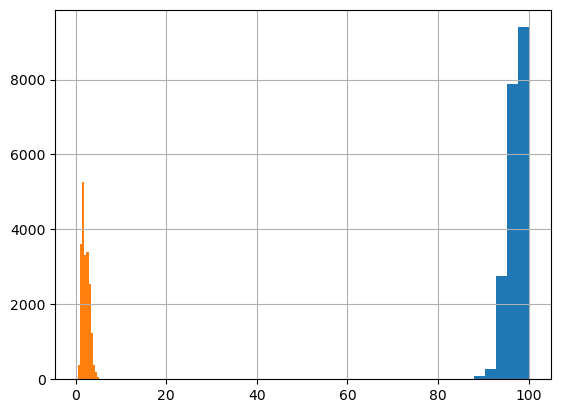

In [18]:
df["O2 Saturation"].hist()
df["FEV1"].hist()